### Importando os Pacotes Utilitários

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from distutils.dir_util import copy_tree
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import tarfile, os
import numpy as np
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Baixando os Conjuntos de Dados

In [3]:
shutil.unpack_archive(filename = '/content/drive/MyDrive/datasets-lung-loc/CheXpert-v1.0-small.zip', 
                      extract_dir = '/content/CheXpert-v1.0-small', format = 'zip')
shutil.unpack_archive(filename = '/content/drive/MyDrive/datasets-lung-loc/vinbigdata.zip', 
                      extract_dir = '/content/vinbigdata/', format = 'zip')
shutil.unpack_archive(filename = '/content/drive/MyDrive/datasets-lung-loc/images.zip', 
                      extract_dir = '/content/images/', format = 'zip')

### Organizando e Analisando os Dados

Text(0, 0.5, 'Imagens')

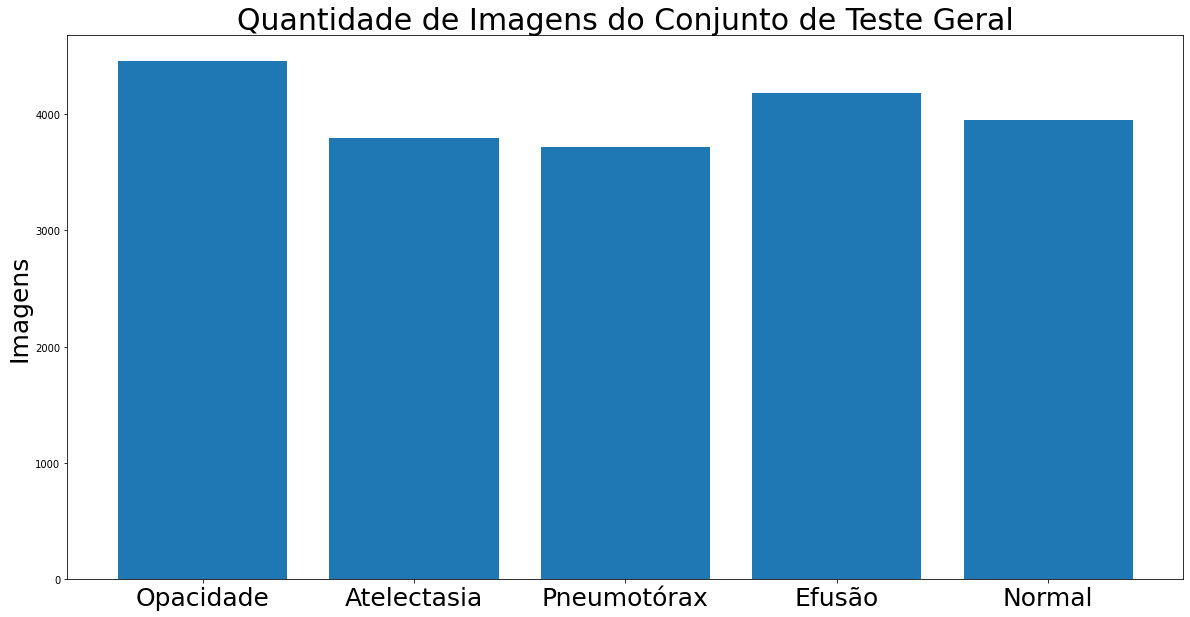

In [4]:
dataset = pd.read_csv('/content/test_geral_dataset.csv', index_col = 0)
findings = ['Opacity', 'Atelectasis', 'Pneumothorax', 'Effusion', 'Abnormal']

count_findings = list()
for finding in findings:
  if finding != 'Abnormal':
    count = dict(dataset[finding].value_counts())[1.0]
    count_findings.append(count)
  else:
    count = dict(dataset[finding].value_counts())[0.0]
    count_findings.append(count)

findings_pt = ['Opacidade', 'Atelectasia', 'Pneumotórax', 'Efusão', 'Normal']

plt.figure(figsize = (20, 10))
plt.bar(findings_pt, count_findings)
plt.xticks(rotation = 0, size = 25)
plt.title('Quantidade de Imagens do Conjunto de Teste Geral', size = 30)
plt.ylabel('Imagens', size = 25)

### Gerador de Imagens do Keras

In [5]:
image_size, batch_size = 224, 64

In [6]:
core_idg_test1 = ImageDataGenerator(preprocessing_function = tf.keras.applications.efficientnet.preprocess_input)
core_idg_test2 = ImageDataGenerator(preprocessing_function = tf.keras.applications.inception_resnet_v2.preprocess_input)
core_idg_test3 = ImageDataGenerator(preprocessing_function = tf.keras.applications.xception.preprocess_input)

In [7]:
test_gen_ab1 = core_idg_test1.flow_from_dataframe(dataframe = dataset, directory = None, 
                                                  x_col = 'Path', y_col = findings[-1], 
                                                  class_mode = 'raw', batch_size = batch_size,
                                                  target_size = (image_size, image_size),
                                                  shuffle = False)
test_gen_ab2 = core_idg_test2.flow_from_dataframe(dataframe = dataset, directory = None, 
                                                  x_col = 'Path', y_col = findings[-1], 
                                                  class_mode = 'raw', batch_size = batch_size,
                                                  target_size = (image_size, image_size),
                                                  shuffle = False)
test_gen_ab3 = core_idg_test3.flow_from_dataframe(dataframe = dataset, directory = None, 
                                                  x_col = 'Path', y_col = findings[-1], 
                                                  class_mode = 'raw', batch_size = batch_size,
                                                  target_size = (image_size, image_size),
                                                  shuffle = False)

y_labels_test_ab1 = test_gen_ab1.labels
y_labels_test_ab2 = test_gen_ab2.labels
y_labels_test_ab3 = test_gen_ab3.labels              

Found 12718 validated image filenames.
Found 12718 validated image filenames.
Found 12718 validated image filenames.


In [8]:
test_gen_cla1 = core_idg_test1.flow_from_dataframe(dataframe = dataset, directory = None, 
                                                   x_col = 'Path', y_col = findings[:-1], 
                                                   class_mode = 'raw', batch_size = batch_size,
                                                   target_size = (image_size, image_size),
                                                   shuffle = False)
test_gen_cla2 = core_idg_test2.flow_from_dataframe(dataframe = dataset, directory = None, 
                                                   x_col = 'Path', y_col = findings[:-1], 
                                                   class_mode = 'raw', batch_size = batch_size,
                                                   target_size = (image_size, image_size),
                                                   shuffle = False)
test_gen_cla3 = core_idg_test3.flow_from_dataframe(dataframe = dataset, directory = None, 
                                                   x_col = 'Path', y_col = findings[:-1], 
                                                   class_mode = 'raw', batch_size = batch_size,
                                                   target_size = (image_size, image_size),
                                                   shuffle = False)  

y_labels_test_cla1 = test_gen_cla1.labels
y_labels_test_cla2 = test_gen_cla2.labels
y_labels_test_cla3 = test_gen_cla3.labels              

Found 12718 validated image filenames.
Found 12718 validated image filenames.
Found 12718 validated image filenames.


### Carregando as Redes Neurais Treinadas - Redes de Detecção

In [ ]:
!mkdir EfficientNetB0_detection
!mkdir InceptionResNetV2_detection
!mkdir Xception_detection

!cp /content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/EfficientNetB0/model_efficientnet3.zip /content/EfficientNetB0_detection
!cp /content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/EfficientNetB0/model.efficientnet.h5 /content/EfficientNetB0_detection

!cp /content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/InceptionResNetV2/model_inceptionresnet3.zip /content/InceptionResNetV2_detection
!cp /content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/InceptionResNetV2/model.inceptionresnet.h5 /content/InceptionResNetV2_detection

!cp /content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/Xception/model_xception3.zip /content/Xception_detection
!cp /content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/Xception/model.xception.h5 /content/Xception_detection 

!unzip /content/EfficientNetB0_detection/model_efficientnet3.zip -d /content/EfficientNetB0_detection
!unzip /content/InceptionResNetV2_detection/model_inceptionresnet3.zip -d /content/InceptionResNetV2_detection
!unzip /content/Xception_detection/model_xception3.zip -d /content/Xception_detection

In [10]:
efficientnet_detection = tf.keras.models.load_model('/content/EfficientNetB0_detection')
efficientnet_detection.load_weights('/content/EfficientNetB0_detection/model.efficientnet.h5')
inceptionresnet_detection = tf.keras.models.load_model('/content/InceptionResNetV2_detection')
inceptionresnet_detection.load_weights('/content/InceptionResNetV2_detection/model.inceptionresnet.h5')
xception_detection = tf.keras.models.load_model('/content/Xception_detection')
xception_detection.load_weights('/content/Xception_detection/model.xception.h5')

### Carregando as Redes Neurais Treinadas - Redes de Classificação

In [ ]:
!mkdir EfficientNetB0_classification
!mkdir InceptionResNetV2_classification
!mkdir Xception_classification

!cp /content/drive/MyDrive/experimentos-finais-pibic/abnormality_classification/EfficientNetB0/model_efficientnet3.zip /content/EfficientNetB0_classification
!cp /content/drive/MyDrive/experimentos-finais-pibic/abnormality_classification/EfficientNetB0/model.efficientnet.h5 /content/EfficientNetB0_classification

!cp /content/drive/MyDrive/experimentos-finais-pibic/abnormality_classification/InceptionResNetV2/model_inceptionresnet3.zip /content/InceptionResNetV2_classification
!cp /content/drive/MyDrive/experimentos-finais-pibic/abnormality_classification/InceptionResNetV2/model.inceptionresnet.h5 /content/InceptionResNetV2_classification

!cp /content/drive/MyDrive/experimentos-finais-pibic/abnormality_classification/Xception/model_xception3.zip /content/Xception_classification
!cp /content/drive/MyDrive/experimentos-finais-pibic/abnormality_classification/Xception/model.xception.h5 /content/Xception_classification 

!unzip /content/EfficientNetB0_classification/model_efficientnet3.zip -d /content/EfficientNetB0_classification
!unzip /content/InceptionResNetV2_classification/model_inceptionresnet3.zip -d /content/InceptionResNetV2_classification
!unzip /content/Xception_classification/model_xception3.zip -d /content/Xception_classification

In [12]:
efficientnet_classification = tf.keras.models.load_model('/content/EfficientNetB0_classification')
efficientnet_classification.load_weights('/content/EfficientNetB0_classification/model.efficientnet.h5')
inceptionresnet_classification = tf.keras.models.load_model('/content/InceptionResNetV2_classification')
inceptionresnet_classification.load_weights('/content/InceptionResNetV2_classification/model.inceptionresnet.h5')
xception_classification = tf.keras.models.load_model('/content/Xception_classification')
xception_classification.load_weights('/content/Xception_classification/model.xception.h5')

### Definindo uma Função de Binarização das Predições

In [13]:
def binarize_preds(pred_array, column, threshold):
  '''
  função que binariza as predições mutirrótulo do modelo

  Args:
    pred_array (array) --> vetor com as predições multirrótulo
    column (int) --> coluna do vetor multirrótulo a ser analisada
    threshold (float) --> valor de threshold a ser considerado na predição
  
  Returns:
    pred_bin (array) --> vetor de predição com os valores binarizados
  '''
  per_100 = pred_array[:,column] * 100
  pred_bin = list()
  for value in per_100:
    if value >= threshold: pred_bin.append(1)
    else: pred_bin.append(0)
  
  return pred_bin

### Métricas de Avaliação com os Dados de Teste - Detecção de Anormalidades

In [14]:
efficientnet_detection.evaluate(test_gen_ab1)
efficientnet_det_pred = efficientnet_detection.predict(test_gen_ab1)
inceptionresnet_detection.evaluate(test_gen_ab2)
inceptionresnet_det_pred = inceptionresnet_detection.predict(test_gen_ab2)
xception_detection.evaluate(test_gen_ab3)
xception_det_pred = xception_detection.predict(test_gen_ab3)

199/199 [==============================] - 169s 837ms/step - loss: 0.2373 - auc_3: 0.9812


In [15]:
for label_index in range(0,1):
  y_pred_bin1 = binarize_preds(pred_array = efficientnet_det_pred, column = label_index, 
                               threshold = 60)
  matrix = confusion_matrix(y_labels_test_ab1, y_pred_bin1)
  acc = (matrix[0,0] + matrix[1,1]) / np.sum(matrix)
  precision = matrix[0,0] / (matrix[0,0] + matrix[0,1])
  recall = matrix[0,0] / (matrix[0,0] + matrix[1,0])
  f1_score = (2 * precision * recall) / (precision + recall) 
  print(f'== Anormalidade EfficientNetB0 == \n{matrix},' 
        f' Threshold = {60}'
        f'\nAcurácia = {acc * 100} % | Precisão = {precision * 100} % | '
        f'\nSensibilidade = {recall * 100} % | F1 Score = {f1_score * 100} %\n')

== Anormalidade EfficientNetB0 == 
[[3602  346]
 [ 466 8304]], Threshold = 60
Acurácia = 93.61534832520837 % | Precisão = 91.23606889564336 % | 
Sensibilidade = 88.54473942969518 % | F1 Score = 89.87025948103793 %



In [16]:
for label_index in range(0,1):
  y_pred_bin2 = binarize_preds(pred_array = inceptionresnet_det_pred, column = label_index, 
                               threshold = 35)
  matrix = confusion_matrix(y_labels_test_ab2, y_pred_bin2)
  acc = (matrix[0,0] + matrix[1,1]) / np.sum(matrix)
  precision = matrix[0,0] / (matrix[0,0] + matrix[0,1])
  recall = matrix[0,0] / (matrix[0,0] + matrix[1,0])
  f1_score = (2 * precision * recall) / (precision + recall) 
  print(f'== Anormalidade InceptionResNetV2 == \n{matrix},' 
        f' Threshold = {35}'
        f'\nAcurácia = {acc * 100} % | Precisão = {precision * 100} % | '
        f'\nSensibilidade = {recall * 100} % | F1 Score = {f1_score * 100} %\n')

== Anormalidade InceptionResNetV2 == 
[[3563  385]
 [ 406 8364]], Threshold = 35
Acurácia = 93.78046862714264 % | Precisão = 90.24822695035462 % | 
Sensibilidade = 89.77072310405644 % | F1 Score = 90.00884173297966 %



In [17]:
for label_index in range(0,1):
  y_pred_bin3 = binarize_preds(pred_array = xception_det_pred, column = label_index, 
                               threshold = 23)
  matrix = confusion_matrix(y_labels_test_ab3, y_pred_bin3)
  acc = (matrix[0,0] + matrix[1,1]) / np.sum(matrix)
  precision = matrix[0,0] / (matrix[0,0] + matrix[0,1])
  recall = matrix[0,0] / (matrix[0,0] + matrix[1,0])
  f1_score = (2 * precision * recall) / (precision + recall) 
  print(f'== Anormalidade Xception == \n{matrix},' 
        f' Threshold = {23}'
        f'\nAcurácia = {acc * 100} % | Precisão = {precision * 100} % | '
        f'\nSensibilidade = {recall * 100} % | F1 Score = {f1_score * 100} %\n')

== Anormalidade Xception == 
[[3548  400]
 [ 334 8436]], Threshold = 23
Acurácia = 94.22865230382136 % | Precisão = 89.86828774062816 % | 
Sensibilidade = 91.3961875321999 % | F1 Score = 90.62579821200511 %



In [18]:
y_pred_bin_detection = list()
for index in range(0, len(y_pred_bin1)):  
  if y_pred_bin1[index] == y_pred_bin2[index] == y_pred_bin3[index]:
    y_pred_bin_detection.append(y_pred_bin1[index])
  elif y_pred_bin3[index] == y_pred_bin2[index]:
    y_pred_bin_detection.append(y_pred_bin3[index])
  elif y_pred_bin3[index] == y_pred_bin1[index]:
    y_pred_bin_detection.append(y_pred_bin3[index])
  elif y_pred_bin2[index] == y_pred_bin1[index]:
    y_pred_bin_detection.append(y_pred_bin2[index])
  else:
    y_pred_bin_detection.append(y_pred_bin3[index])

In [22]:
matrix = confusion_matrix(y_labels_test_ab1, y_pred_bin_detection)
acc = (matrix[0,0] + matrix[1,1]) / np.sum(matrix)
precision = matrix[0,0] / (matrix[0,0] + matrix[0,1])
recall = matrix[0,0] / (matrix[0,0] + matrix[1,0])
f1_score = (2 * precision * recall) / (precision + recall) 
print(f'== Anormalidade (Modelos em Conjunto) == \n{matrix},' 
      f'\nAcurácia = {acc * 100} % | Precisão = {precision * 100} % | '
      f'\nSensibilidade = {recall * 100} % | F1 Score = {f1_score * 100} %\n')

== Anormalidade (Modelos em Conjunto) == 
[[3581  367]
 [ 354 8416]],
Acurácia = 94.33086963359018 % | Precisão = 90.70415400202634 % | 
Sensibilidade = 91.00381194409148 % | F1 Score = 90.85373588735254 %



### Métricas de Avaliação com os Dados de Teste - Classificação de Anormalidades

In [21]:
def verify_abnormal_images(pred_detection, pred_classification):
  '''
  adiciona a detecção de anormalidade nos dados de classificação

  Args:
    pred_detection (list) --> lista da rede de detecção de anormalidade
    pred_classification (list) --> lista da rede de classificação de anormalidade
  
  Returns:
    pred_classification (list) --> lista da rede de classificação corrigida
  '''

  for index, value in enumerate(pred_detection):
    if value == 0:
      pred_classification[index] = 0
  
  return pred_classification

In [23]:
bt_efficientnet_cla = [36, 63, 35, 59]
bt_inceptionresnet_cla = [51, 29, 51, 37]
bt_xception_cla = [65, 36, 55, 54]

In [24]:
efficientnet_classification.evaluate(test_gen_cla1)
efficientnet_cla_pred = efficientnet_classification.predict(test_gen_cla1)
inceptionresnet_classification.evaluate(test_gen_cla2)
inceptionresnet_cla_pred = inceptionresnet_classification.predict(test_gen_cla2)
xception_classification.evaluate(test_gen_cla3)
xception_cla_pred = xception_classification.predict(test_gen_cla3)

199/199 [==============================] - 168s 832ms/step - loss: 0.5346 - auc_2: 0.8723


In [25]:
findings_pt = ['Opacidade', 'Atelectasia', 'Pneumotórax', 'Efusão']

In [55]:
for label_index in range(0, len(findings[:-1])):
  y_pred_bin4_in = binarize_preds(pred_array = efficientnet_cla_pred, column = label_index, 
                               threshold = bt_efficientnet_cla[label_index])
  y_pred_bin4_in = verify_abnormal_images(pred_detection = y_pred_bin_detection, 
                                       pred_classification = y_pred_bin4_in)
  matrix = confusion_matrix(y_labels_test_cla1[:, label_index], y_pred_bin4_in)
  acc = (matrix[0,0] + matrix[1,1]) / np.sum(matrix)
  precision = matrix[0,0] / (matrix[0,0] + matrix[0,1])
  recall = matrix[0,0] / (matrix[0,0] + matrix[1,0])
  f1_score = (2 * precision * recall) / (precision + recall) 
  print(f'=={findings_pt[label_index]} EfficientNetB0 == \n{matrix},' 
        f' Threshold = {bt_efficientnet_cla[label_index]}'
        f'\nAcurácia = {acc * 100} % | Precisão = {precision * 100} % | '
        f'\nSensibilidade = {recall * 100} % | F1 Score = {f1_score * 100} %\n')
  
  if label_index == 0: y_pred_bin4 = y_pred_bin4_in
  else: y_pred_bin4 = np.vstack((y_pred_bin4, y_pred_bin4_in))

y_pred_bin4 = y_pred_bin4.T

==Opacidade EfficientNetB0 == 
[[7333  927]
 [1215 3243]], Threshold = 36
Acurácia = 83.15772920270483 % | Precisão = 88.7772397094431 % | 
Sensibilidade = 85.78614880673841 % | F1 Score = 87.25606853879104 %

==Atelectasia EfficientNetB0 == 
[[7769 1150]
 [1079 2720]], Threshold = 63
Acurácia = 82.47365938040573 % | Precisão = 87.10617782262585 % | 
Sensibilidade = 87.80515370705244 % | F1 Score = 87.45426915067259 %

==Pneumotórax EfficientNetB0 == 
[[8434  566]
 [ 599 3119]], Threshold = 35
Acurácia = 90.83975467840855 % | Precisão = 93.71111111111111 % | 
Sensibilidade = 93.36875899479685 % | F1 Score = 93.53962180446958 %

==Efusão EfficientNetB0 == 
[[7356 1181]
 [ 739 3442]], Threshold = 59
Acurácia = 84.90328668029564 % | Precisão = 86.16610050368982 % | 
Sensibilidade = 90.87090796788141 % | F1 Score = 88.45598845598846 %



In [31]:
acc_geral = (83.15772920270483 + 82.47365938040573 + 90.83975467840855 + 84.90328668029564) / 4
precision_geral = (88.7772397094431 + 87.10617782262585 + 93.71111111111111 + 86.16610050368982) / 4
recall_geral = (85.78614880673841 + 87.80515370705244 + 93.36875899479685 + 90.87090796788141) / 4
f1_score_geral = (87.25606853879104 + 87.45426915067259 + 93.53962180446958 + 88.45598845598846) / 4
print(f'== Classificação - EfficientNetB0 ==' 
        f'\nAcurácia = {acc_geral} % | Precisão = {precision_geral} % | '
        f'\nSensibilidade = {recall_geral} % | F1 Score = {f1_score_geral} %\n')

== Classificação - EfficientNetB0 ==
Acurácia = 85.34360748545369 % | Precisão = 88.94015728671747 % | 
Sensibilidade = 89.45774236911728 % | F1 Score = 89.17648698748042 %



In [56]:
for label_index in range(0, len(findings[:-1])):
  y_pred_bin5_in = binarize_preds(pred_array = inceptionresnet_cla_pred, column = label_index, 
                               threshold = bt_inceptionresnet_cla[label_index])
  y_pred_bin5_in = verify_abnormal_images(pred_detection = y_pred_bin_detection, 
                                       pred_classification = y_pred_bin5_in)
  matrix = confusion_matrix(y_labels_test_cla2[:, label_index], y_pred_bin5_in)
  acc = (matrix[0,0] + matrix[1,1]) / np.sum(matrix)
  precision = matrix[0,0] / (matrix[0,0] + matrix[0,1])
  recall = matrix[0,0] / (matrix[0,0] + matrix[1,0])
  f1_score = (2 * precision * recall) / (precision + recall) 
  print(f'=={findings_pt[label_index]} InceptionResNetV2 == \n{matrix},' 
        f' Threshold = {bt_inceptionresnet_cla[label_index]}'
        f'\nAcurácia = {acc * 100} % | Precisão = {precision * 100} % | '
        f'\nSensibilidade = {recall * 100} % | F1 Score = {f1_score * 100} %\n')
  
  if label_index == 0: y_pred_bin5 = y_pred_bin5_in
  else: y_pred_bin5 = np.vstack((y_pred_bin5, y_pred_bin5_in))

y_pred_bin5 = y_pred_bin5.T

==Opacidade InceptionResNetV2 == 
[[7318  942]
 [1375 3083]], Threshold = 51
Acurácia = 81.78172668658594 % | Precisão = 88.59564164648911 % | 
Sensibilidade = 84.18267571609341 % | F1 Score = 86.33280245384299 %

==Atelectasia InceptionResNetV2 == 
[[7767 1152]
 [1034 2765]], Threshold = 29
Acurácia = 82.81176285579494 % | Precisão = 87.08375378405651 % | 
Sensibilidade = 88.2513350755596 % | F1 Score = 87.66365688487585 %

==Pneumotórax InceptionResNetV2 == 
[[8525  475]
 [ 655 3063]], Threshold = 51
Acurácia = 91.11495518163233 % | Precisão = 94.72222222222221 % | 
Sensibilidade = 92.86492374727669 % | F1 Score = 93.78437843784377 %

==Efusão InceptionResNetV2 == 
[[7733  804]
 [ 993 3188]], Threshold = 37
Acurácia = 85.8704198773392 % | Precisão = 90.58217172308774 % | 
Sensibilidade = 88.62021544808619 % | F1 Score = 89.5904535712217 %



In [33]:
acc_geral = (81.78172668658594 + 82.81176285579494 + 91.11495518163233 + 85.8704198773392) / 4
precision_geral = (88.59564164648911 + 87.08375378405651 + 94.72222222222221 + 90.58217172308774) / 4
recall_geral = (84.18267571609341 + 88.2513350755596 + 92.86492374727669 + 88.62021544808619) / 4
f1_score_geral = (86.33280245384299 + 87.66365688487585 + 93.78437843784377 + 89.5904535712217) / 4
print(f'== Classificação - InceptionResNetV2 ==' 
        f'\nAcurácia = {acc_geral} % | Precisão = {precision_geral} % | '
        f'\nSensibilidade = {recall_geral} % | F1 Score = {f1_score_geral} %\n')

== Classificação - InceptionResNetV2 ==
Acurácia = 85.3947161503381 % | Precisão = 90.2459473439639 % | 
Sensibilidade = 88.47978749675397 % | F1 Score = 89.34282283694608 %



In [57]:
for label_index in range(0, len(findings[:-1])):
  y_pred_bin6_in = binarize_preds(pred_array = xception_cla_pred, column = label_index, 
                                  threshold = bt_xception_cla[label_index])
  y_pred_bin6_in = verify_abnormal_images(pred_detection = y_pred_bin_detection, 
                                          pred_classification = y_pred_bin6_in)
  matrix = confusion_matrix(y_labels_test_cla3[:, label_index], y_pred_bin6_in)
  acc = (matrix[0,0] + matrix[1,1]) / np.sum(matrix)
  precision = matrix[0,0] / (matrix[0,0] + matrix[0,1])
  recall = matrix[0,0] / (matrix[0,0] + matrix[1,0])
  f1_score = (2 * precision * recall) / (precision + recall) 
  print(f'=={findings_pt[label_index]} Xception == \n{matrix},' 
        f' Threshold = {bt_xception_cla[label_index]}'
        f'\nAcurácia = {acc * 100} % | Precisão = {precision * 100} % | '
        f'\nSensibilidade = {recall * 100} % | F1 Score = {f1_score * 100} %\n')
  
  if label_index == 0: y_pred_bin6 = y_pred_bin6_in
  else: y_pred_bin6 = np.vstack((y_pred_bin6, y_pred_bin6_in))

y_pred_bin6 = y_pred_bin6.T

==Opacidade Xception == 
[[7666  594]
 [1390 3068]], Threshold = 65
Acurácia = 84.40006290297217 % | Precisão = 92.80871670702179 % | 
Sensibilidade = 84.65106007067138 % | F1 Score = 88.54238854238852 %

==Atelectasia Xception == 
[[7751 1168]
 [1117 2682]], Threshold = 36
Acurácia = 82.03333857524768 % | Precisão = 86.90436147550173 % | 
Sensibilidade = 87.404149751917 % | F1 Score = 87.15353910159105 %

==Pneumotórax Xception == 
[[8587  413]
 [ 683 3035]], Threshold = 55
Acurácia = 91.38229281333543 % | Precisão = 95.41111111111111 % | 
Sensibilidade = 92.63214670981661 % | F1 Score = 94.00109469074987 %

==Efusão Xception == 
[[7700  837]
 [ 922 3259]], Threshold = 54
Acurácia = 86.16920899512502 % | Precisão = 90.19561906993088 % | 
Sensibilidade = 89.30642542333565 % | F1 Score = 89.74881986129728 %



In [36]:
acc_geral = (84.40006290297217 + 82.03333857524768 + 91.38229281333543 + 86.16920899512502) / 4
precision_geral = (92.80871670702179 + 86.90436147550173 + 94.72222222222221 + 90.19561906993088) / 4
recall_geral = (84.65106007067138 + 87.404149751917 + 92.63214670981661 + 89.30642542333565) / 4
f1_score_geral = (88.54238854238852 + 87.15353910159105 + 94.00109469074987 + 89.74881986129728) / 4
print(f'== Classificação - Xception ==' 
        f'\nAcurácia = {acc_geral} % | Precisão = {precision_geral} % | '
        f'\nSensibilidade = {recall_geral} % | F1 Score = {f1_score_geral} %\n')

== Classificação - Xception ==
Acurácia = 85.99622582167007 % | Precisão = 91.15772986866916 % | 
Sensibilidade = 88.49844548893516 % | F1 Score = 89.8614605490067 %



In [61]:
for label_index in range(0, y_pred_bin4.shape[1]):
  y_pred_bin_classification_in = list()
  for index in range(0, len(y_pred_bin4)):  
    if y_pred_bin4[index, label_index] == y_pred_bin5[index, label_index] == y_pred_bin6[index, label_index]:
      y_pred_bin_classification_in.append(y_pred_bin4[index, label_index])
    elif y_pred_bin6[index, label_index] == y_pred_bin5[index, label_index]:
      y_pred_bin_classification_in.append(y_pred_bin6[index, label_index])
    elif y_pred_bin6[index, label_index] == y_pred_bin4[index, label_index]:
      y_pred_bin_classification_in.append(y_pred_bin6[index, label_index])
    elif y_pred_bin5[index, label_index] == y_pred_bin4[index, label_index]:
      y_pred_bin_classification_in.append(y_pred_bin5[index, label_index])
    else:
      y_pred_bin_classification_in.append(y_pred_bin6[index, label_index])
  
  if label_index == 0: y_pred_bin_classification = y_pred_bin_classification_in
  else: y_pred_bin_classification = np.vstack((y_pred_bin_classification, y_pred_bin_classification_in))

y_pred_bin_classification = y_pred_bin_classification.T

In [63]:
for label_index in range(0, len(findings[:-1])):
  matrix = confusion_matrix(y_labels_test_cla1[:, label_index], y_pred_bin_classification[:, label_index])
  acc = (matrix[0,0] + matrix[1,1]) / np.sum(matrix)
  precision = matrix[0,0] / (matrix[0,0] + matrix[0,1])
  recall = matrix[0,0] / (matrix[0,0] + matrix[1,0])
  f1_score = (2 * precision * recall) / (precision + recall) 
  print(f'=={findings_pt[label_index]} (Modelos no Geral) == \n{matrix},'
        f'\nAcurácia = {acc * 100} % | Precisão = {precision * 100} % | '
        f'\nSensibilidade = {recall * 100} % | F1 Score = {f1_score * 100} %\n')

==Opacidade (Modelos no Geral) == 
[[7597  663]
 [1204 3254]],
Acurácia = 85.32001887089164 % | Precisão = 91.97336561743342 % | 
Sensibilidade = 86.31973639359164 % | F1 Score = 89.05691342828675 %

==Atelectasia (Modelos no Geral) == 
[[7925  994]
 [ 930 2869]],
Acurácia = 84.87183519421293 % | Precisão = 88.85525283103487 % | 
Sensibilidade = 89.49745906267646 % | F1 Score = 89.1751997299426 %

==Pneumotórax (Modelos no Geral) == 
[[8658  342]
 [ 554 3164]],
Acurácia = 92.9548671174713 % | Precisão = 96.2 % | 
Sensibilidade = 93.98610508033 % | F1 Score = 95.08016692290798 %

==Efusão (Modelos no Geral) == 
[[7752  785]
 [ 751 3430]],
Acurácia = 87.92262934423651 % | Precisão = 90.80473234157198 % | 
Sensibilidade = 91.16782312125132 % | F1 Score = 90.98591549295773 %



In [64]:
acc_geral = (85.32001887089164 + 84.87183519421293 + 92.9548671174713 + 87.92262934423651) / 4
precision_geral = (91.97336561743342 + 88.85525283103487 + 96.2 + 90.80473234157198) / 4
recall_geral = (86.31973639359164 + 89.49745906267646 + 93.98610508033 + 91.16782312125132) / 4
f1_score_geral = (89.05691342828675 + 89.1751997299426 + 95.08016692290798 + 90.98591549295773) / 4
print(f'== Classificação - Modelos no Geral ==' 
        f'\nAcurácia = {acc_geral} % | Precisão = {precision_geral} % | '
        f'\nSensibilidade = {recall_geral} % | F1 Score = {f1_score_geral} %\n')

== Classificação - Modelos no Geral ==
Acurácia = 87.76733763170309 % | Precisão = 91.95833769751007 % | 
Sensibilidade = 90.24278091446236 % | F1 Score = 91.07454889352377 %

